# Composite Indicators: Minimal Pipeline

## 1. Basic settings

In [102]:
# LOAD LIBRARIES

import os
from cif import cif
import pandas as pd
import re
import datetime
from IPython.display import Image

In [101]:
import importlib
importlib.reload(cif)

<module 'cif.cif' from 'c:\\users\\lenka.vrana\\appdata\\local\\continuum\\anaconda3\\lib\\site-packages\\cif\\cif.py'>

In [2]:
# CHECK AVAILABILITY

print(os.environ['X13PATH']) # Check the availability of X-13ARIMA-SEATS model (downloaded from https://www.census.gov/srd/www/x13as/)

C:\Program Files\WinX13\x13as


In [3]:
# SETTINGS

#os.chdir('C:/path/') # Set path to CIF folder
os.chdir('C:/Users/lenka.vrana/Desktop/')

bw = False # True for black and white visualisations

country = 'CZE' # Select target country

In [4]:
# OUTPUT DIRECTORY

strDate = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")

outputDir = os.path.join('plots_' + country + '_' + strDate)
os.makedirs(outputDir, exist_ok = True)

## 2. Data Load

Loading data from OECD API.

In [5]:
data_all, subjects_all, measures_all = cif.createDataFrameFromOECD(countries = [country], dsname = 'MEI', frequency = 'M')
data_rs, subjects_rs, measures_rs = cif.createDataFrameFromOECD(countries = [country], dsname = 'QNA', subject = ['B1_GE'], frequency = 'Q')

Requesting URL http://stats.oecd.org/SDMX-JSON/data/MEI/CZE...M/all
Data downloaded from http://stats.oecd.org/SDMX-JSON/data/MEI/CZE...M/all?dimensionAtObservation=AllDimensions
Requesting URL http://stats.oecd.org/SDMX-JSON/data/QNA/CZE.B1_GE..Q/all
Data downloaded from http://stats.oecd.org/SDMX-JSON/data/QNA/CZE.B1_GE..Q/all?dimensionAtObservation=AllDimensions


In [6]:
data_all.tail(12) # MEI database data from last year

country      CZE                                                        \
subject BCBUTE02 BCCICP02 BCEMFT02 BCOBLV02 BCSPFT02 BRBUFT02 BRBUTE02   
measure     STSA     STSA     STSA     STSA     STSA     STSA     STSA   
time                                                                     
2017-05     29.7    -24.0    -15.4    -32.5      5.3     15.2     41.1   
2017-06     28.7    -20.3     -8.1    -32.5      7.9     22.0     41.7   
2017-07     26.0    -23.8    -12.8    -34.8      7.9     22.9     43.5   
2017-08     26.5    -18.7     -9.3    -28.1      8.9     27.2     46.6   
2017-09     32.1    -17.0     -9.4    -24.6     10.9     21.8     42.0   
2017-10     25.3    -17.4     -7.3    -27.6     12.6     21.6     47.4   
2017-11     26.7    -15.4     -3.2    -27.7     11.0     25.8     46.3   
2017-12     31.9    -13.2      0.7    -27.2     12.7     21.0     48.8   
2018-01     35.7    -14.4     -1.2    -27.6     19.1     31.4     43.3   
2018-02     36.9     -8.4      4.3    -21.0     21.5     35.5     47.2   
2018-03     35.8     -5.9      6.1    -17.8     14.3     30.1     47.1   
2018-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

country                               ...                            \
subject BRCICP02 BREMFT02 BRODFT02    ...       XTIMVA01              
measure     STSA     STSA     STSA    ...           CXML     CXMLSA   
time                                  ...                             
2017-05     17.5     19.3      9.8    ...      13.698161  13.554005   
2017-06     19.5     17.0     15.1    ...      13.838968  13.426819   
2017-07     20.0     19.9     11.7    ...      12.353728  13.371372   
2017-08     22.7     19.9     13.1    ...      13.690276  14.648650   
2017-09     19.3     18.0      9.3    ...      14.528817  14.151477   
2017-10     20.6     15.8     14.5    ...      16.067323  15.266729   
2017-11     21.4     13.8     14.4    ...      15.762748  14.616404   
2017-12     20.9     11.6      3.5    ...      13.342337  13.993939   
2018-01     23.1     16.4     19.3    ...      15.716900  16.376704   
2018-02     25.0     26.7     10.4    ...            NaN        NaN   
2018-03     23.7     29.9     14.2    ...            NaN        NaN   
2018-04      NaN      NaN      NaN    ...            NaN        NaN   

country                                                                 \
subject                                             XTNTVA01             
measure       GPSA       GYSA     NCML      NCMLSA      CXML    CXMLSA   
time                                                                     
2017-05  11.884943  12.537356  329.598  326.129401  1.600525  1.548013   
2017-06  -0.938363  10.032601  323.679  314.039267  1.917999  1.609570   
2017-07  -0.412957  19.978515  279.929  302.988294  0.719478  0.640772   
2017-08   9.552331  17.123590  302.667  323.854904  1.214980  1.469462   
2017-09  -3.393987  15.260089  317.968  309.709787  1.896476  1.897314   
2017-10   7.880820  31.190478  352.176  334.627967  1.497940  1.181380   
2017-11  -4.259755  20.543374  343.006  318.060920  1.815671  1.601425   
2017-12  -4.258674  19.456249  289.178  303.300633  0.963010  2.628501   
2018-01  17.027119  32.110890  328.270  342.050951  1.524243  0.562832   
2018-02        NaN        NaN      NaN         NaN       NaN       NaN   
2018-03        NaN        NaN      NaN         NaN       NaN       NaN   
2018-04        NaN        NaN      NaN         NaN       NaN       NaN   

country                     
subject                     
measure    NCML     NCMLSA  
time                        
2017-05  38.511  37.247472  
2017-06  44.860  37.646162  
2017-07  16.303  14.519554  
2017-08  26.861  32.487129  
2017-09  41.505  41.523345  
2017-10  32.833  25.894390  
2017-11  39.510  34.847878  
2017-12  20.872  56.969382  
2018-01  31.836  11.755557  
2018-02     NaN        NaN  
2018-03     NaN        NaN  
2018-04     NaN        NaN  

[12 rows x 196 columns]

In [7]:
# 1a) leading indicators: Component series

colMultiInd = data_all.columns.names.index('subject')

ind_LOCO = subjects_all['id'].apply(lambda x: re.search(r'\bLOCO', x) != None)
subjects_LOCO = subjects_all[ind_LOCO]

# 1b) Leading indicators: Reference series

ind_LORS = subjects_all['id'].apply(lambda x: re.search(r'\bLORS', x) != None)
subjects_LORS = subjects_all[ind_LORS]


# 1c) Leading indicators: CLI

ind_LOLI = subjects_all['id'].apply(lambda x: re.search(r'\bLOLI', x) != None)
subjects_LOLI = subjects_all[ind_LOLI]

# 1d) Candidate time series

subjects_adj = subjects_all[-(ind_LOCO | ind_LORS | ind_LOLI)]
data_adj = data_all.select(lambda x: x[colMultiInd] in list(subjects_adj['id']), axis = 1)

## 3. Data Transformations

### 3.1 Reference Series

In [16]:
# 2) DATA TRANSFORMATIONS

# 2.1) REFERENCE SERIES

# 2.1a) Priority list of reference series (GDP) and frequency conversion

rsPriorityList = [ 'LNBQRSA' # Best fit with OECD reference series
                , 'CQR'
                , 'LNBQR'
                , 'DNBSA'
                , 'DOBSA'
                , 'CQRSA'
                , 'CARSA'
                , 'GPSA'
                , 'GYSA'
                , 'CPCARSA'
                , 'VIXOBSA'
                , 'VOBARSA'
                , 'VPVOBARSA'
                , 'HCPCARSA'
                , 'HVPVOBARSA'
                ]

if (data_rs.shape[0] > 0):
    
    rsq = cif.getOnlyBestMeasure(df = data_rs, priorityList = rsPriorityList)
    rsq = cif.getRidOfMultiindex(df = rsq)
    rsq = cif.renameQuarterlyIndex(df = rsq)
    rsq = cif.getIndexAsDate(df = rsq)
    rs = cif.createMonthlySeries(df = rsq)
    rs.dropna(inplace = True)

Data with country multiindex level.


In [17]:
data_rs.tail(4) # all available measures of the reference series (last year, quaterly series)

country        CZE                                                   \
subject      B1_GE                                                    
measure      CARSA        CPCARSA        CQR      CQRSA       DNBSA   
time                                                                  
2017-Q1  4886948.0  386171.242343  1158733.0  1221737.0  108.335565   
2017-Q2  5034400.0  400260.914790  1265494.0  1258600.0  108.951586   
2017-Q3  5113196.0  408680.748980  1286646.0  1278299.0  109.952597   
2017-Q4  5165120.0  417035.312913  1331999.0  1291280.0  110.491508   

country                                                              \
subject                                                               
measure       DOBSA      GPSA      GYSA      HCPCARSA    HVPVOBARSA   
time                                                                  
2017-Q1  108.335565  1.518272  2.994109  36507.018561  31219.025586   
2017-Q2  108.951586  2.434794  4.637810  37821.120173  31964.035822   
2017-Q3  109.952597  0.640500  5.118628  38580.265173  32138.397393   
2017-Q4  110.491508  0.522798  5.203228  39346.665998  32288.127847   

country                                                              
subject                                                              
measure      LNBQR    LNBQRSA     VIXOBSA    VOBARSA      VPVOBARSA  
time                                                                 
2017-Q1  1073214.0  1127734.0  113.841690  4510936.0  330234.852654  
2017-Q2  1163626.0  1155192.0  116.613501  4620768.0  338275.391100  
2017-Q3  1172621.0  1162591.0  117.360410  4650364.0  340442.043586  
2017-Q4  1198237.0  1168669.0  117.973968  4674676.0  342221.867050

In [18]:
rs.tail(12) # selected measure of the reference series (last year, monthly series)

,CZE_B1_GE_LNBQRSA
2016-12-01,372163.333333
2017-01-01,374037.333333
2017-02-01,375911.333333
2017-03-01,378962.222222
2017-04-01,382013.111111
2017-05-01,385064.000000
2017-06-01,385886.111111
2017-07-01,386708.222222
2017-08-01,387530.333333
2017-09-01,388205.666667


In [24]:
# 2.1b) Seasonal adjustment, outlier filtering and short-term prediction
#   & Cycle identification (Hodrick-Prescott filter)
#   & Normalisation

fileLogs = open(os.path.join(outputDir, country + '_fileLogs_rsTransformation.txt'), 'w')
rs_SA_HP_norm = cif.pipelineTransformations(rs, showPlots = False, savePlots = outputDir, saveLogs = fileLogs)
fileLogs.close()


ANALYSING SERIES 1 from 1: CZE_B1_GE_LNBQRSA

BEST MODEL BY TRAMO: (1, 2, 1) (0, 0, 0)


c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(p

In [12]:
# 2.2) INDIVIDUAL INDICATORS

# 2.2a) Priority list of OECD available measures

priorityList = ['NCML'
                , 'ML'
                , 'CXML'
                , 'ST'
                , 'NCCU'
                , 'CXCU'
                , 'IXOB'
                , 'NCMLSA'
                , 'MLSA'
                , 'CXMLSA'
                , 'STSA'
                , 'NCCUSA'
                , 'CXCUSA'
                , 'IXOBSA'
                , 'IXNSA'
                , 'GP'
                , 'GY']

if data_adj.shape[0] > 0:
    
    data = cif.getOnlyBestMeasure(df = data_adj, priorityList = priorityList)
    data = cif.getRidOfMultiindex(df = data)
    data = cif.getIndexAsDate(data)

Data with country multiindex level.


In [13]:
data = data.iloc[:, 0:10] # fake dimensionality reduction

print(data.shape)

(340, 10)


In [25]:
# 2.2b) Seasonal adjustment, outlier filtering and short-term prediction
#   & Cycle identification (Hodrick-Prescott filter)
#   & Normalisation

fileLogs = open(os.path.join(outputDir, 'fileLogs_dataTransformation.txt'), 'w')
data_SA_HP_norm = cif.pipelineTransformations(df = data, showPlots = False, savePlots = outputDir, saveLogs = fileLogs, createInverse = True) 
fileLogs.close()


ANALYSING SERIES 1 from 10: CZE_BCBUTE02_STSA

BEST MODEL BY TRAMO: (0, 1, 2) (0, 0, 0)


c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(p


ANALYSING SERIES 2 from 10: CZE_BCCICP02_STSA

BEST MODEL BY TRAMO: (3, 1, 1) (1, 0, 1)


c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(p


ANALYSING SERIES 3 from 10: CZE_BCEMFT02_STSA

BEST MODEL BY TRAMO: (3, 1, 1) (0, 0, 1)


c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(p


ANALYSING SERIES 4 from 10: CZE_BCOBLV02_STSA

BEST MODEL BY TRAMO: (3, 1, 1) (1, 0, 1)


c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(p


ANALYSING SERIES 5 from 10: CZE_BCSPFT02_STSA

BEST MODEL BY TRAMO: (1, 1, 0) (1, 1, 1)


c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(p


ANALYSING SERIES 6 from 10: CZE_BRBUFT02_STSA

BEST MODEL BY TRAMO: (0, 1, 1) (0, 0, 0)


c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(p


ANALYSING SERIES 7 from 10: CZE_BRBUTE02_STSA

BEST MODEL BY TRAMO: (0, 1, 2) (1, 0, 1)


c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(p


ANALYSING SERIES 8 from 10: CZE_BRCICP02_STSA

BEST MODEL BY TRAMO: (0, 1, 1) (0, 1, 1)


c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(p


ANALYSING SERIES 9 from 10: CZE_BREMFT02_STSA

BEST MODEL BY TRAMO: (0, 1, 1) (0, 1, 1)


c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(p


ANALYSING SERIES 10 from 10: CZE_BRODFT02_STSA

BEST MODEL BY TRAMO: (1, 0, 1) (0, 0, 0)


c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\lenka.vrana\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(p

In [68]:
# 3) TURNING-POINT DETECTION (Bry-Boschan algorithm)

# 3.1) REFERENCE SERIES

fileLogs = open(os.path.join(outputDir, country + '_fileLogs_rsEvaluation.txt'), 'w')
rs_ind_turningPoints = cif.pipelineTPDetection(rs_SA_HP_norm, printDetails = False, showPlots = False, savePlots = outputDir, saveLogs = fileLogs)
fileLogs.close()


ANALYSING SERIES 1 from 1: CZE_B1_GE_LNBQRSA


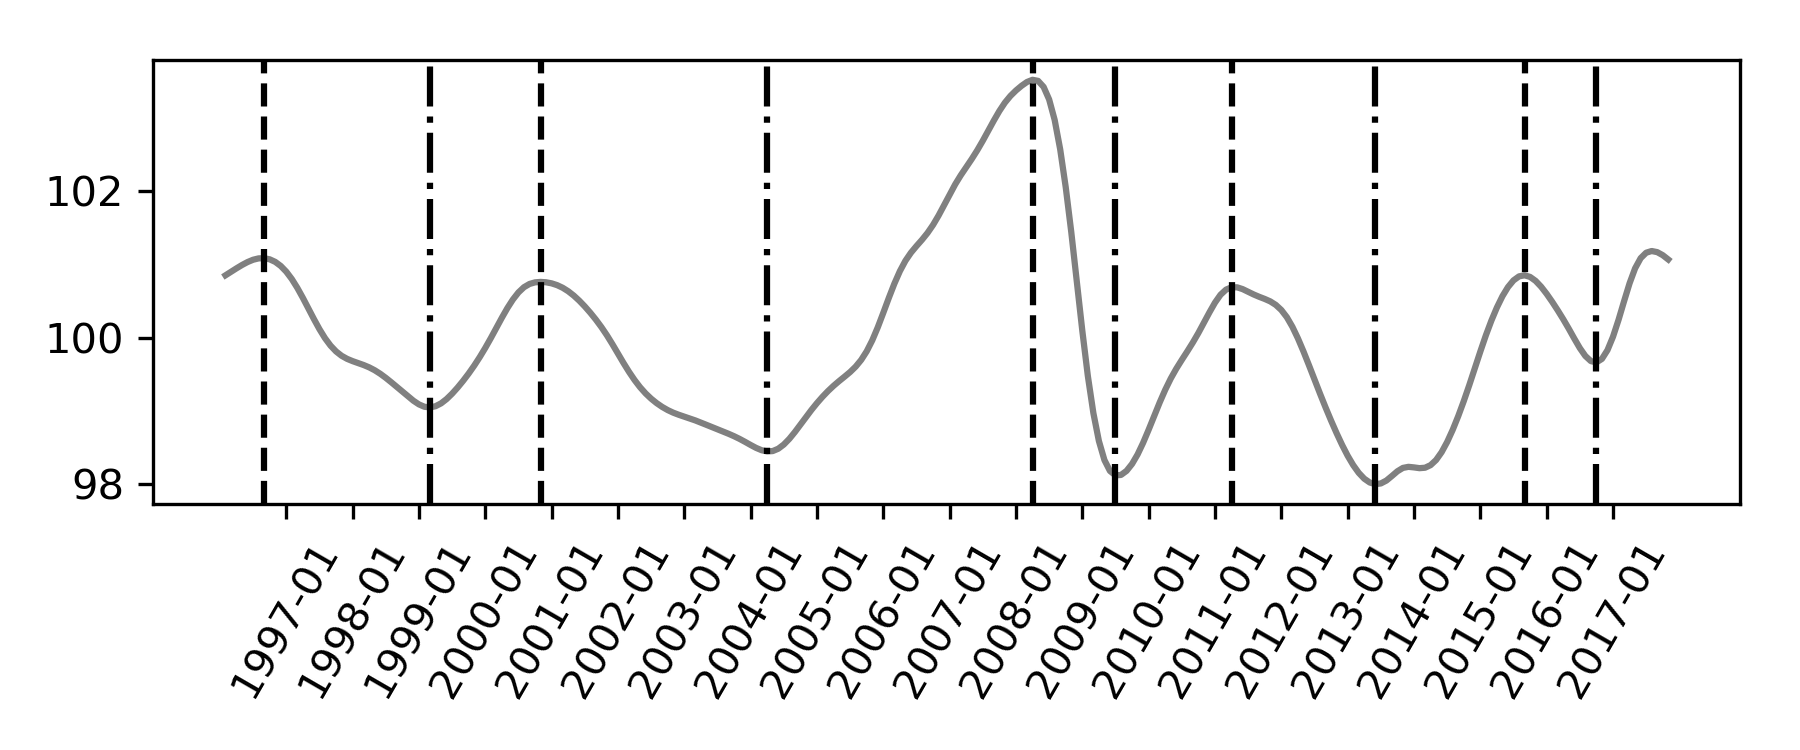

In [103]:
Image(os.path.join(outputDir, 'CZE_B1_GE_LNBQRSA' + '_05_ext.png'))

In [55]:
# 3.2) INDIVIDUAL INDICATORS

fileLogs = open(os.path.join(outputDir, 'fileLogs_dataEvaluation.txt'), 'w')
data_ind_turningPoints = cif.pipelineTPDetection(df = data_SA_HP_norm, origColumns = list(data.columns), printDetails = False, showPlots = False, savePlots = outputDir, saveLogs = fileLogs)
fileLogs.close()


ANALYSING SERIES 1 from 10: CZE_BCBUTE02_STSA

ANALYSING SERIES 2 from 10: CZE_BCCICP02_STSA

ANALYSING SERIES 3 from 10: CZE_BCEMFT02_STSA

ANALYSING SERIES 4 from 10: CZE_BCOBLV02_STSA

ANALYSING SERIES 5 from 10: CZE_BCSPFT02_STSA

ANALYSING SERIES 6 from 10: CZE_BRBUFT02_STSA

ANALYSING SERIES 7 from 10: CZE_BRBUTE02_STSA

ANALYSING SERIES 8 from 10: CZE_BRCICP02_STSA

ANALYSING SERIES 9 from 10: CZE_BREMFT02_STSA

ANALYSING SERIES 10 from 10: CZE_BRODFT02_STSA


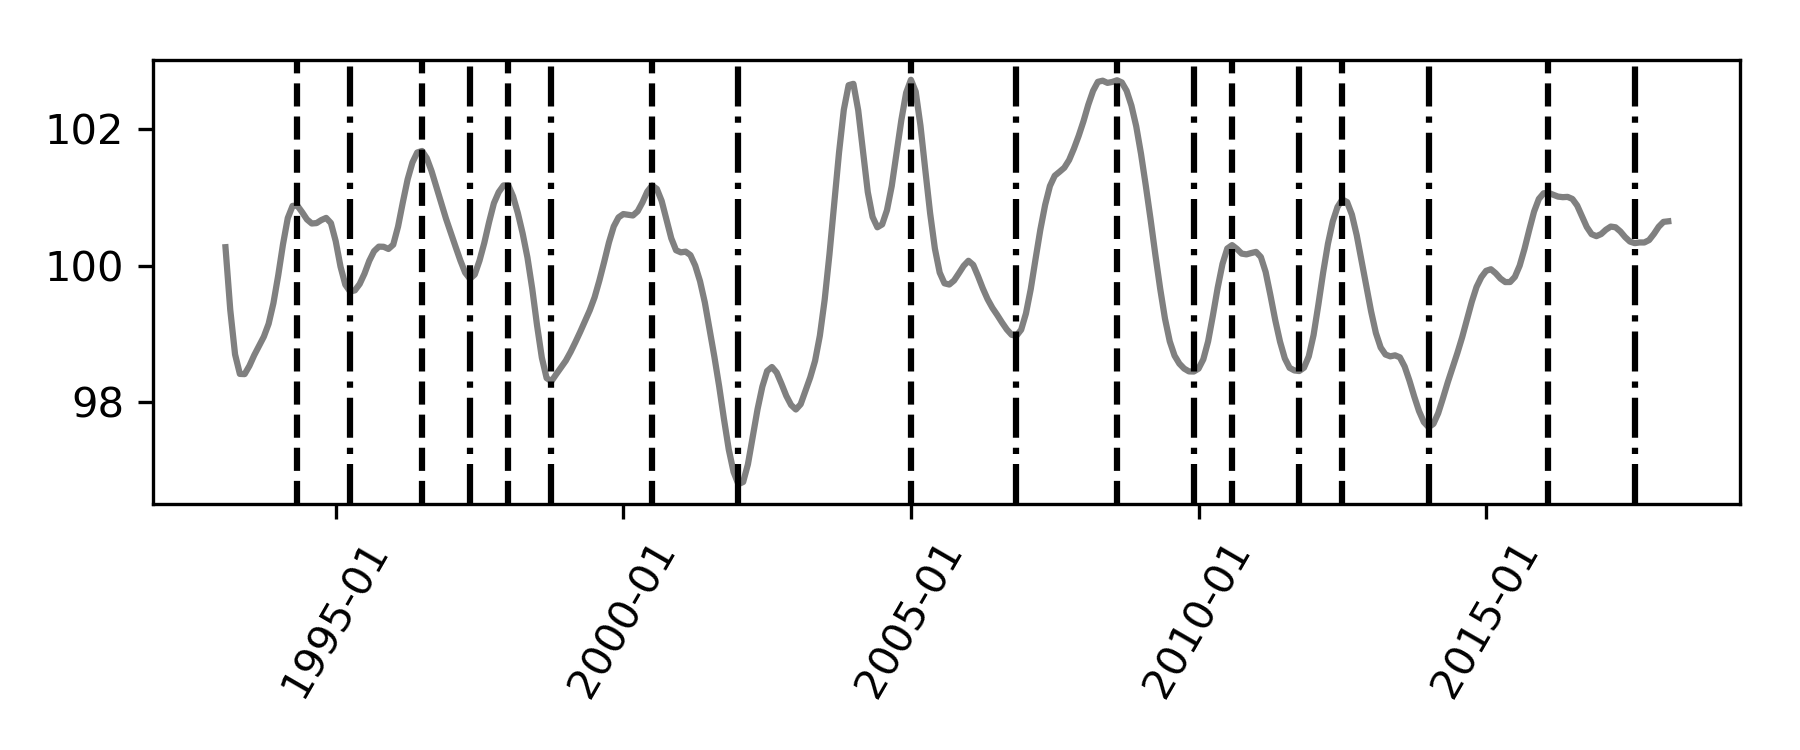

In [86]:
Image(os.path.join(outputDir, 'CZE_BCBUTE02_STSA' + '_05_ext.png'))

In [66]:
# 4) TURNING-POINTS MATCHING

fileLogs = open(os.path.join(outputDir, country + '_fileLogs_tpMatching.txt'), 'w')
data_ind_extOrd, data_ind_time, data_ind_missing, data_ind_missingEarly, data_ind_extra = cif.pipelineTPMatching(df1 = rs_SA_HP_norm, df2 = data_SA_HP_norm, ind1 = rs_ind_turningPoints, ind2 = data_ind_turningPoints, printDetails = False, showPlots = False, savePlots = outputDir, saveLogs = fileLogs, nameSuffix = '_06_matching' + '_rs' + country)
fileLogs.close()


ANALYSING SERIES 1 from 20: CZE_BCBUTE02_STSA

ANALYSING SERIES 2 from 20: CZE_BCBUTE02_STSA_INV

ANALYSING SERIES 3 from 20: CZE_BCCICP02_STSA

ANALYSING SERIES 4 from 20: CZE_BCCICP02_STSA_INV

ANALYSING SERIES 5 from 20: CZE_BCEMFT02_STSA

ANALYSING SERIES 6 from 20: CZE_BCEMFT02_STSA_INV

ANALYSING SERIES 7 from 20: CZE_BCOBLV02_STSA

ANALYSING SERIES 8 from 20: CZE_BCOBLV02_STSA_INV

ANALYSING SERIES 9 from 20: CZE_BCSPFT02_STSA

ANALYSING SERIES 10 from 20: CZE_BCSPFT02_STSA_INV

ANALYSING SERIES 11 from 20: CZE_BRBUFT02_STSA

ANALYSING SERIES 12 from 20: CZE_BRBUFT02_STSA_INV

ANALYSING SERIES 13 from 20: CZE_BRBUTE02_STSA

ANALYSING SERIES 14 from 20: CZE_BRBUTE02_STSA_INV

ANALYSING SERIES 15 from 20: CZE_BRCICP02_STSA

ANALYSING SERIES 16 from 20: CZE_BRCICP02_STSA_INV

ANALYSING SERIES 17 from 20: CZE_BREMFT02_STSA

ANALYSING SERIES 18 from 20: CZE_BREMFT02_STSA_INV

ANALYSING SERIES 19 from 20: CZE_BRODFT02_STSA

ANALYSING SERIES 20 from 20: CZE_BRODFT02_STSA_INV


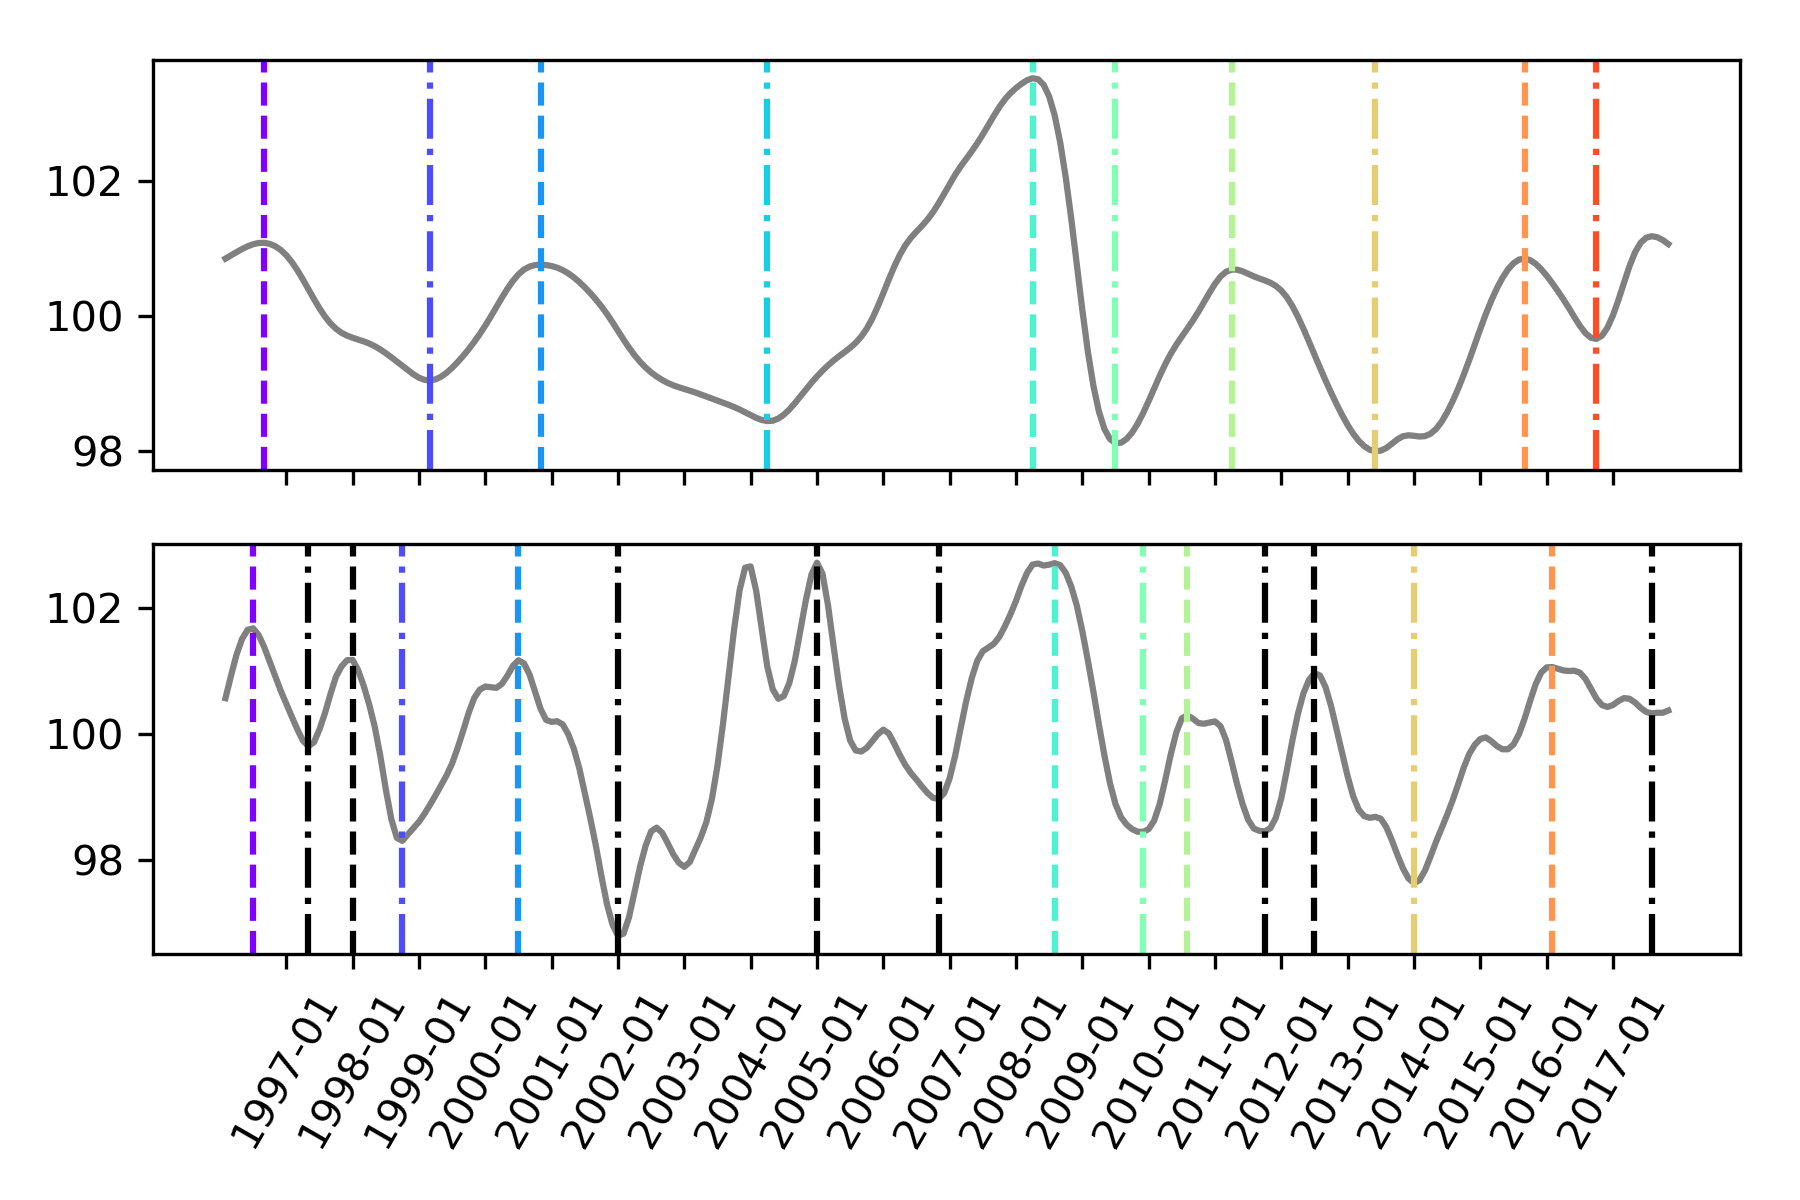

In [88]:
Image(os.path.join(outputDir, 'CZE_BCBUTE02_STSA' + '_06_matching_rsCZE.png'))

In [69]:
# 5) EVALUATION

data_totalEval, data_selectedEval, data_selectedCol = cif.pipelineEvaluation(df1 = rs_SA_HP_norm, df2 = data_SA_HP_norm, missing = data_ind_missing, missingEarly = data_ind_missingEarly, extra = data_ind_extra, time = data_ind_time, maxInd = 15)


ANALYSING SERIES 1 from 20: CZE_BCBUTE02_STSA

ANALYSING SERIES 2 from 20: CZE_BCBUTE02_STSA_INV

ANALYSING SERIES 3 from 20: CZE_BCCICP02_STSA

ANALYSING SERIES 4 from 20: CZE_BCCICP02_STSA_INV

ANALYSING SERIES 5 from 20: CZE_BCEMFT02_STSA

ANALYSING SERIES 6 from 20: CZE_BCEMFT02_STSA_INV

ANALYSING SERIES 7 from 20: CZE_BCOBLV02_STSA

ANALYSING SERIES 8 from 20: CZE_BCOBLV02_STSA_INV

ANALYSING SERIES 9 from 20: CZE_BCSPFT02_STSA

ANALYSING SERIES 10 from 20: CZE_BCSPFT02_STSA_INV

ANALYSING SERIES 11 from 20: CZE_BRBUFT02_STSA

ANALYSING SERIES 12 from 20: CZE_BRBUFT02_STSA_INV

ANALYSING SERIES 13 from 20: CZE_BRBUTE02_STSA

ANALYSING SERIES 14 from 20: CZE_BRBUTE02_STSA_INV

ANALYSING SERIES 15 from 20: CZE_BRCICP02_STSA

ANALYSING SERIES 16 from 20: CZE_BRCICP02_STSA_INV

ANALYSING SERIES 17 from 20: CZE_BREMFT02_STSA

ANALYSING SERIES 18 from 20: CZE_BREMFT02_STSA_INV

ANALYSING SERIES 19 from 20: CZE_BRODFT02_STSA

ANALYSING SERIES 20 from 20: CZE_BRODFT02_STSA_INV

Checking

In [89]:
data_selectedEval

,targeted,missing,missingEarly,extra,leadMean,leadMedian,leadStDev,leadCVar,corrMax,corrPosition,sanityCheck,total
CZE_BRODFT02_STSA_INV,10.0,1.0,0.0,8.0,10.777778,14.0,9.010796,0.836053,0.202719,14.0,0.0,13.35


In [70]:
# 6) AGGREGATION & FINAL EVALUATION 

# 6a) CLI construction

agg_cMat = data_SA_HP_norm.loc[:, data_selectedCol] # value of the de-trended, smoothed and normalised component

CLI = cif.pipelineCreateCLI(agg_cMat).rename(columns = {'CLI': country + '_CLI'})

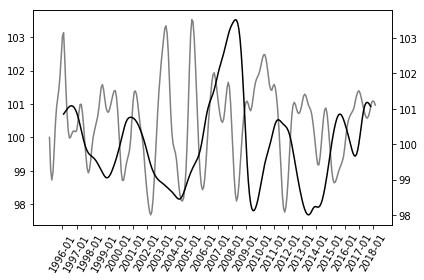

In [71]:
cif.compareTwoSeries(CLI, rs_SA_HP_norm)

In [73]:
# 6b) CLI turning points

fileLogs = open(os.path.join(outputDir, country + '_fileLogs_CLIEvaluation.txt'), 'w')
CLI_ind_turningPoints = cif.pipelineTPDetection(CLI, printDetails = False, showPlots = False, savePlots = outputDir, saveLogs = fileLogs)
fileLogs.close()


ANALYSING SERIES 1 from 1: CZE_CLI


In [91]:
# 6c) Match turning points

CLI_ind_extOrd, CLI_ind_time, CLI_ind_missing, CLI_ind_missingEarly, CLI_ind_extra = cif.pipelineTPMatching(df1 = rs_SA_HP_norm, df2 = CLI, ind1 = rs_ind_turningPoints, ind2 = CLI_ind_turningPoints, showPlots = False, savePlots = outputDir, nameSuffix = '_06_matching' + '_rs' + country, bw = bw)


ANALYSING SERIES 1 from 1: CZE_CLI


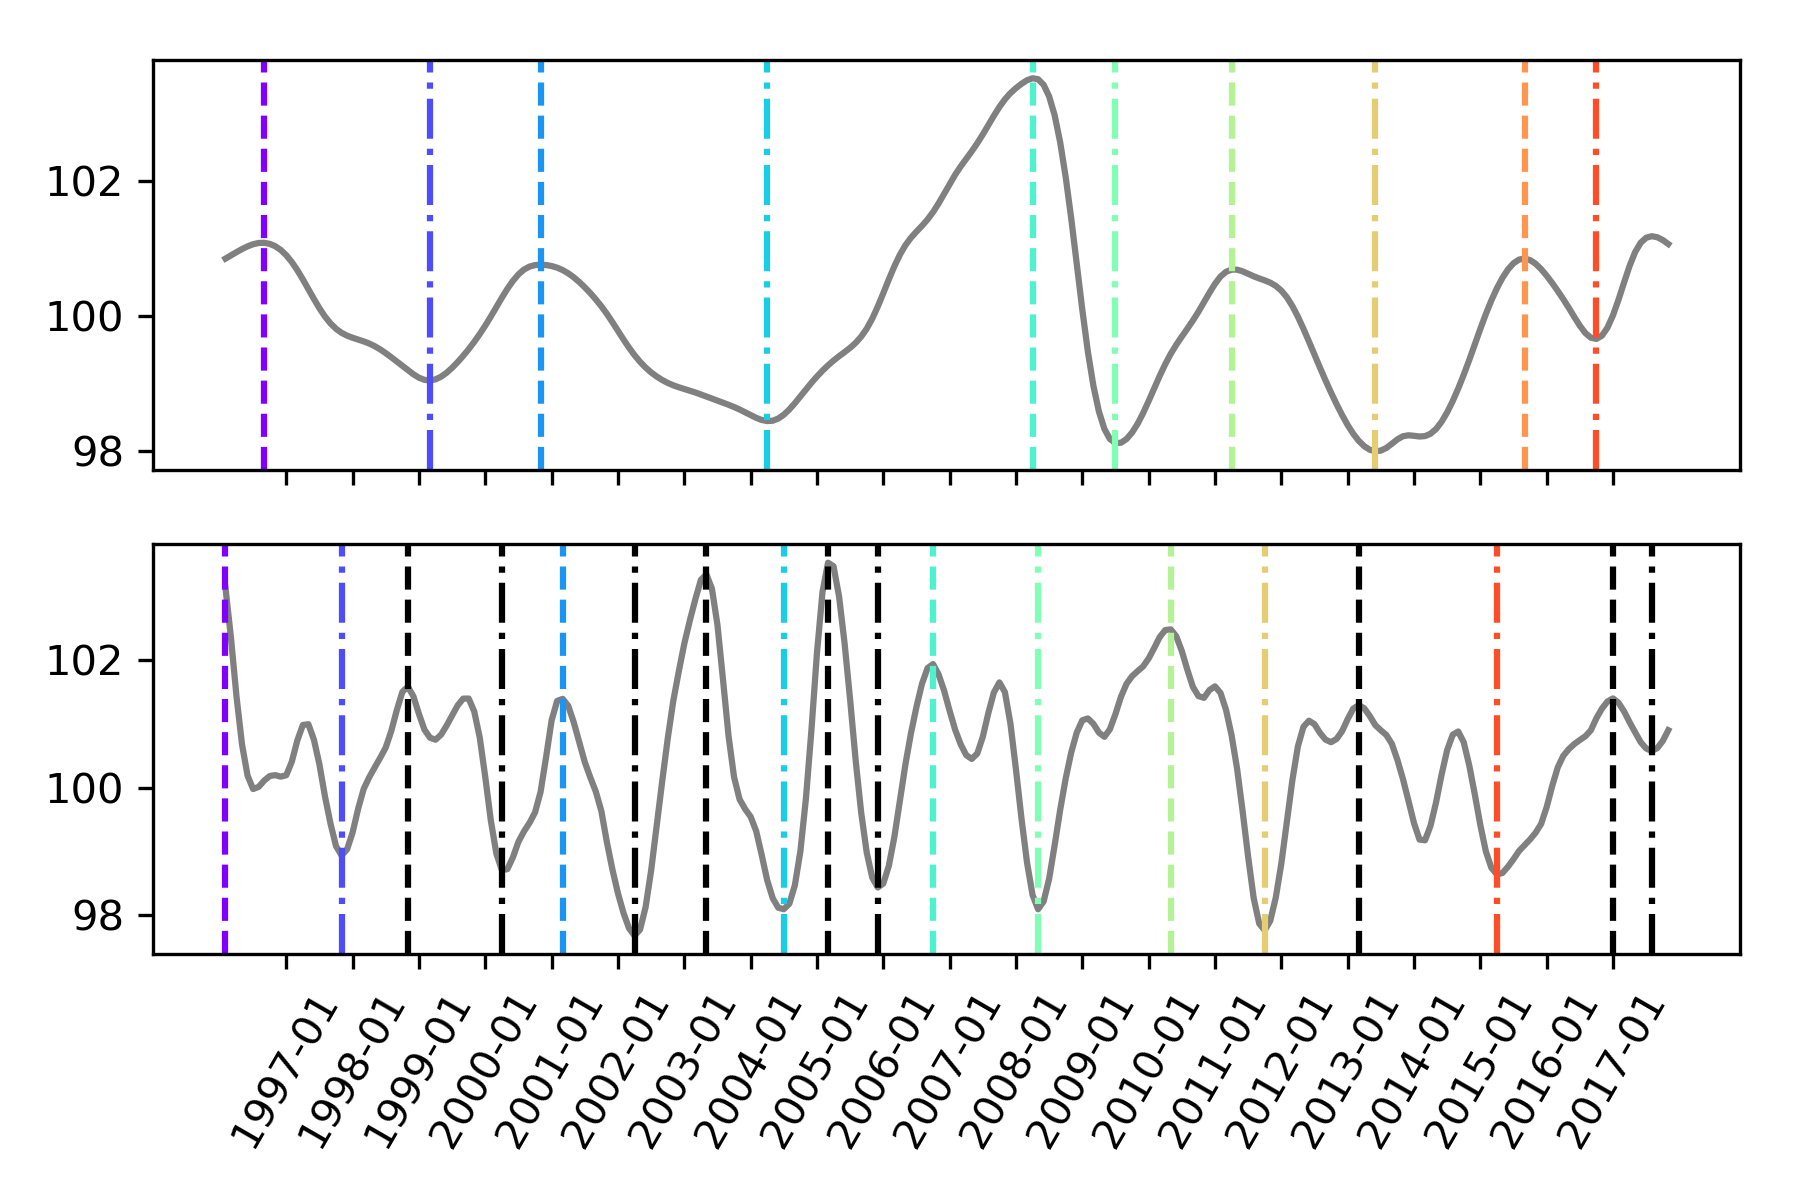

In [92]:
Image(os.path.join(outputDir, 'CZE_CLI' + '_06_matching_rsCZE.png'))

In [75]:
# 6d) Basic characteristics
    
CLI_eval = cif.pipelineEvaluation(df1 = rs_SA_HP_norm, df2 = CLI, missing = CLI_ind_missing, missingEarly = CLI_ind_missingEarly, extra = CLI_ind_extra, time = CLI_ind_time, evalOnly = True)


ANALYSING SERIES 1 from 1: CZE_CLI


In [76]:
CLI_eval

,targeted,missing,missingEarly,extra,leadMean,leadMedian,leadStDev,leadCVar,corrMax,corrPosition,sanityCheck
CZE_CLI,10.0,1.0,0.0,8.0,10.777778,14.0,9.010796,0.836053,0.200801,14.0,0.0
